In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split


# Load the dataset
file_path = '/content/drive/MyDrive/Tuesday-WorkingHours.pcap_ISCX.csv'
data = pd.read_csv(file_path)

# Display the first few rows and column names
print(data.head())
print(data.columns)
print(len(data.columns))


    Destination Port   Flow Duration   Total Fwd Packets  \
0                 88             640                   7   
1                 88             900                   9   
2                 88            1205                   7   
3                 88             511                   7   
4                 88             773                   9   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        4                          440   
1                        4                          600   
2                        4                         2776   
3                        4                          452   
4                        4                          612   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                           358                     220   
1                          2944                     300   
2                          2830                    1388   
3                           370                 

In [2]:

data.columns = data.columns.str.replace(' ', '')

print(data.columns)


Index(['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets/s',
       'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       '

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445909 entries, 0 to 445908
Data columns (total 79 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DestinationPort          445909 non-null  int64  
 1   FlowDuration             445909 non-null  int64  
 2   TotalFwdPackets          445909 non-null  int64  
 3   TotalBackwardPackets     445909 non-null  int64  
 4   TotalLengthofFwdPackets  445909 non-null  int64  
 5   TotalLengthofBwdPackets  445909 non-null  int64  
 6   FwdPacketLengthMax       445909 non-null  int64  
 7   FwdPacketLengthMin       445909 non-null  int64  
 8   FwdPacketLengthMean      445909 non-null  float64
 9   FwdPacketLengthStd       445909 non-null  float64
 10  BwdPacketLengthMax       445909 non-null  int64  
 11  BwdPacketLengthMin       445909 non-null  int64  
 12  BwdPacketLengthMean      445909 non-null  float64
 13  BwdPacketLengthStd       445909 non-null  float64
 14  Flow

In [4]:
data.Label.nunique()


3

In [5]:
data.Label.unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator'], dtype=object)

In [6]:
data.Label.value_counts()

BENIGN         432074
FTP-Patator      7938
SSH-Patator      5897
Name: Label, dtype: int64

In [7]:

data['Label'] = data['Label'].apply(lambda x: 'ATTACK' if x != 'BENIGN' else x)


In [8]:
data.Label.unique()

array(['BENIGN', 'ATTACK'], dtype=object)

In [9]:
data.Label.value_counts()

BENIGN    432074
ATTACK     13835
Name: Label, dtype: int64

In [10]:
data.head()


,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [11]:
#limiting BENIGN data to 200 000 considering processing power
benign_samples = data[data['Label'] == 'BENIGN'].sample(n=200000, random_state=42)
malicious_samples = data[data['Label'] == 'ATTACK'].sample(n=13835, random_state=42)

# Combine the sampled data
data = pd.concat([benign_samples, malicious_samples])

# Shuffle the data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [12]:
data.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,53,30381751,2,2,99,223,61,38,49.5,16.263456,...,32,23302.0,0.0,23302,23302,30300000.0,0.0,30300000,30300000,BENIGN
1,443,4623881,5,1,123,46,46,0,24.6,23.276598,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,53,23546,1,1,55,116,55,55,55.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,44424,59,1,1,0,0,0,0,0.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,53,31031,2,2,44,108,22,22,22.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [13]:
data.Label.value_counts()

BENIGN    200000
ATTACK     13835
Name: Label, dtype: int64

In [14]:

features = data.drop('Label', axis=1)
labels = data['Label']

In [15]:
features.replace([np.inf, -np.inf], np.nan, inplace=True)
features.dropna(inplace=True)

In [16]:
features = features.select_dtypes(include=[float, int])


In [17]:
len(features)

213718

In [18]:
features

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
0,53,30381751,2,2,99,223,61,38,49.500000,16.263456,...,1,32,23302.0,0.0,23302,23302,30300000.0,0.0,30300000,30300000
1,443,4623881,5,1,123,46,46,0,24.600000,23.276598,...,2,32,0.0,0.0,0,0,0.0,0.0,0,0
2,53,23546,1,1,55,116,55,55,55.000000,0.000000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,44424,59,1,1,0,0,0,0,0.000000,0.000000,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
4,53,31031,2,2,44,108,22,22,22.000000,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213830,443,685412,10,4,626,687,389,0,62.600000,123.030439,...,5,32,0.0,0.0,0,0,0.0,0.0,0,0
213831,443,5997414,7,4,635,168,517,0,90.714286,190.707205,...,3,32,611762.0,0.0,611762,611762,5385650.0,0.0,5385650,5385650
213832,57323,123,1,1,0,0,0,0,0.000000,0.000000,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
213833,53,47288,4,2,168,190,42,42,42.000000,0.000000,...,3,20,0.0,0.0,0,0,0.0,0.0,0,0


In [19]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

In [21]:
round(data.shape[0]*80/100)-1

171067

In [22]:
missing_labels = np.isnan(y_encoded).sum()
print(f"Number of missing values in y_encoded: {missing_labels}")

Number of missing values in y_encoded: 0


In [23]:
train_size = round(len(y_encoded) * 0.8)

X_train = features_scaled[:train_size]
X_test = features_scaled[train_size:]
y_train = y_encoded[:train_size]
y_test = y_encoded[train_size:]

print(f"Length of X_train: {len(X_train)}")
print(f"Length of y_train: {len(y_train)}")
print(f"Length of X_test: {len(X_test)}")
print(f"Length of y_test: {len(y_test)}")

min_len = min(len(X_test), len(y_test))
X_test = X_test[:min_len]
y_test = y_test[:min_len]

print(f"Final Length of X_test: {len(X_test)}")
print(f"Final Length of y_test: {len(y_test)}")



Length of X_train: 171068
Length of y_train: 171068
Length of X_test: 42650
Length of y_test: 42767
Final Length of X_test: 42650
Final Length of y_test: 42650


In [25]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report

# Initialize and train the One-Class SVM model
ocsvm = OneClassSVM(kernel='rbf', nu=0.01, gamma='auto')
ocsvm.fit(X_train)

# Predict anomalies on the test set
y_pred = ocsvm.predict(X_test)

# Convert predictions to DataFrame for evaluation
y_test_df = pd.DataFrame(y_test, columns=['Label'])
y_test_df['Prediction'] = y_pred

# Evaluate the model
print("Number of anomalies detected:", (y_pred == -1).sum())




Number of anomalies detected: 567


In [26]:
from sklearn.metrics import accuracy_score

# Convert One-Class SVM predictions to 0 and 1: -1 for outliers and 1 for inliers
svm_predict = np.where(y_pred == -1, 1, 0)  # Replace -1 with 1 and 1 with 0

# Convert true labels to 0 and 1 as well
y_test_mapped = np.where(y_test == 'ATTACK', 1, 0)

accuracy = accuracy_score(y_test_mapped, svm_predict)
print("Accuracy in separating Outliers:", accuracy)


Accuracy in separating Outliers: 0.9867057444314186


In [27]:

y_pred = np.array(y_pred)

# Get unique values and their counts
unique_values, counts = np.unique(y_pred, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f'Value: {value}, Count: {count}')


Value: -1, Count: 567
Value: 1, Count: 42083


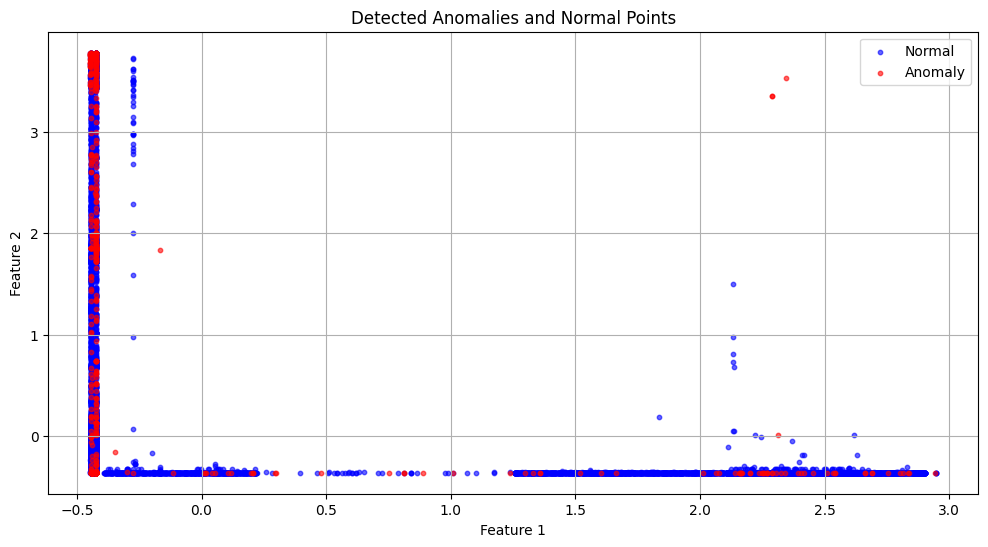

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.scatter(X_test[:, 0][y_pred == 1], X_test[:, 1][y_pred == 1], c='blue', label='Normal', s=10, alpha=0.6)

plt.scatter(X_test[:, 0][y_pred == -1], X_test[:, 1][y_pred == -1], c='red', label='Anomaly', s=10, alpha=0.6)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Detected Anomalies and Normal Points')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso_forest.fit(X_train)

y_pred = iso_forest.predict(X_test)

print("Number of anomalies detected:", (y_pred == -1).sum())

iso_forest_predict = np.where(y_pred == -1, 1, 0)

accuracy = accuracy_score(y_test, iso_forest_predict)
print("Accuracy in separating Outliers:", accuracy)

unique_values, counts = np.unique(y_pred, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f'Value: {value}, Count: {count}')


Number of anomalies detected: 424
Accuracy in separating Outliers: 0.07256740914419695
Value: -1, Count: 424
Value: 1, Count: 42226
